In [117]:
#importing relevant libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier

In [118]:
#Lecture du et traitement jeu de données

dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

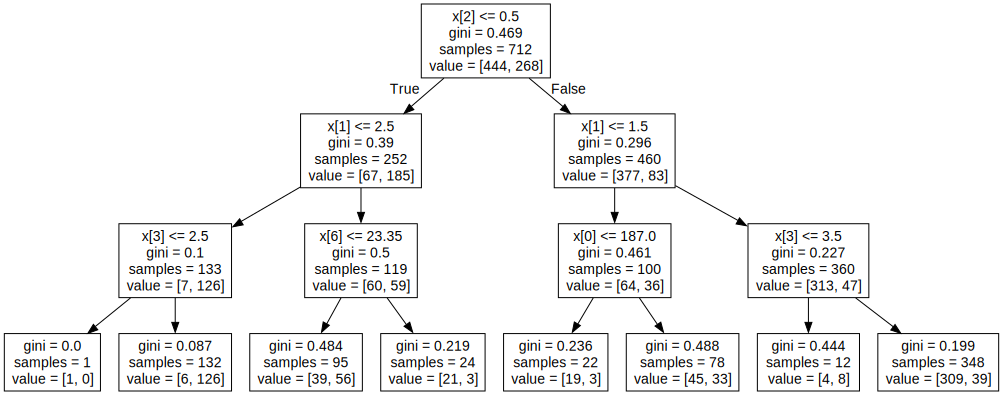

In [119]:
# créez un ensemble d’entraînement et un ensemble de test
x = data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#l’arbre de décision

tree = DecisionTreeClassifier()  
tree.fit(x_train, y_train)
y_pred=tree.predict(x_test) 

arbre = export_graphviz(tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("arbre00")
graph

In [120]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.770949720670391


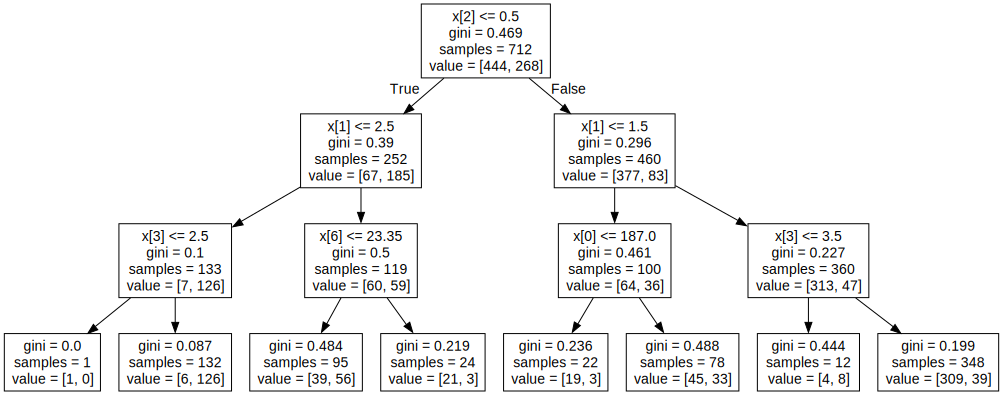

In [121]:
#Modifiez les paramètres de l’arbre de décision (au moins deux paramètres).

trees = DecisionTreeClassifier(max_depth=3, min_samples_split=4)
trees.fit(x_train, y_train)  
trees.fit(x_train, y_train)   #fitting our model
y_pred=trees.predict(x_test)   # evaluating our model

arbre01 = export_graphviz(trees, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("arbre01")
graph


In [122]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


In [123]:
rfc = RandomForestClassifier()

#Utilisation d'une forêt aléatoire 
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8491620111731844


In [124]:
#Utilisation d'une forêt aléatoire et modification du nombre d’estimateurs
rfc = RandomForestClassifier(n_estimators=50) 
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8547486033519553
